In [1]:
import Duplicate.Similar_Dection.Similar_Dection as SD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'Duplicate'

In [2]:
fname = 'data/full_name.csv'
data = pd.read_csv(fname, index_col = 0)
print(data.head())

                0                 1
0     Abig. SMITH     Abigail SMITH
1     Abig. JONES     Abigail JONES
2     Abig. BROWN     Abigail BROWN
3   Abig. JOHNSON   Abigail JOHNSON
4  Abig. WILLIAMS  Abigail WILLIAMS


In [3]:
test = SD.SimilarDection(2, 1, 0.5, 0.3)
score = []
for row in data.itertuples(index=False):
    score.append(test.Smith_Waterman(row[0], row[1])[2])

In [4]:
new_score = list(map(lambda x: int(x * 100), score))
round_score = []
for s in new_score:
    if s<0:
        temp = 0
    elif s%10 < 3:
        temp = int(s/10)*10
    elif s%10 <7:
        temp = int(s/10)*10 + 5
    else:
        temp = (int(s/10) + 1)*10
    round_score.append(temp)

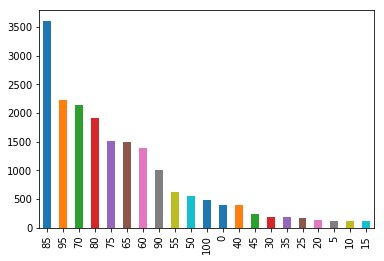

In [30]:
hist_score = pd.DataFrame(round_score)
hist_score[hist_score.columns[0]].value_counts().plot.bar()
plt.savefig('paired_name.jpg')
plt.show()

In [32]:
idx = np.where(hist_score<50)[0]
name1_l = data.iloc[:, 0]
name2_l = data.iloc[:, 1]
name1 = list(name1_l[idx])
name2 = list(name2_l[idx])
false_positive = list(zip(name1, name2))
tmp = [x for x in false_positive if not('Alf.' in x[0] or 'Dy' in x[0])]
# print(len(false_positive))
# print(name2[1])
print(len(false_positive))
rate = float(len(false_positive))/len(data)
print(rate)
print(false_positive)

2090
0.10976890756302521
[('Alex. MC', 'Alexander MC'), ('Alex. CO', 'Alexander CO'), ('Alex. WM', 'Alexander WM'), ('Alf. SMITH', 'Alphonse SMITH'), ('Alf. JONES', 'Alphonse JONES'), ('Alf. BROWN', 'Alphonse BROWN'), ('Alf. JOHNSON', 'Alphonse JOHNSON'), ('Alf. WILLIAMS', 'Alphonse WILLIAMS'), ('Alf. MILLER', 'Alphonse MILLER'), ('Alf. TAYLOR', 'Alphonse TAYLOR'), ('Alf. WILSON', 'Alphonse WILSON'), ('Alf. DAVIS', 'Alphonse DAVIS'), ('Alf. WHITE', 'Alphonse WHITE'), ('Alf. CLARK', 'Alphonse CLARK'), ('Alf. HALL', 'Alphonse HALL'), ('Alf. THOMAS', 'Alphonse THOMAS'), ('Alf. THOMPSON', 'Alphonse THOMPSON'), ('Alf. MOORE', 'Alphonse MOORE'), ('Alf. HILL', 'Alphonse HILL'), ('Alf. WALKER', 'Alphonse WALKER'), ('Alf. ANDERSON', 'Alphonse ANDERSON'), ('Alf. WRIGHT', 'Alphonse WRIGHT'), ('Alf. MARTIN', 'Alphonse MARTIN'), ('Alf. WOOD', 'Alphonse WOOD'), ('Alf. ALLEN', 'Alphonse ALLEN'), ('Alf. ROBINSON', 'Alphonse ROBINSON'), ('Alf. LEWIS', 'Alphonse LEWIS'), ('Alf. SCOTT', 'Alphonse SCOTT')

In [20]:
name1_l = data.iloc[:, 0]
name2_l = data.iloc[:, 1]
t = np.random.permutation(name2_l)
false_data = zip(name1_l, t)
false_score = []
test = SD.SimilarDection(2, 1, 0.5, 0.3)
for str1, str2 in false_data:
#     print(str1, '----',  str2)
#     print(str1, str2)
    false_score.append(test.Smith_Waterman(str1, str2)[2])

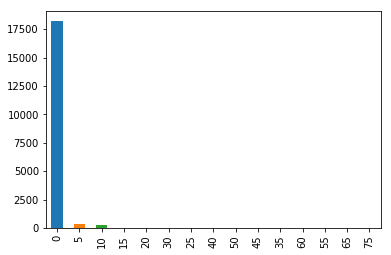

In [33]:
round_false_score = []
new_false_score = list(map(lambda x: int(x * 100), false_score))
for s in new_false_score:
    if s<0:
        temp = 0
    elif s%10 < 3:
        temp = int(s/10)*10
    elif s%10 <7:
        temp = int(s/10)*10 + 5
    else:
        temp = (int(s/10) + 1)*10
    round_false_score.append(temp)

hist_false_score = pd.DataFrame(round_false_score)
hist_false_score[hist_score.columns[0]].value_counts().plot.bar()
plt.savefig('report/unpaired_name.jpg')
plt.show()

In [22]:
idx = np.where(hist_false_score > 50)[0]
name1 = list(name1_l[idx])
name2 = list(t[idx])
false_positive = list(zip(name1, name2))
print(len(false_positive)/len(hist_false_score))
print(false_positive)

0.0004726890756302521
[('Brid. COLLINS', 'Edward COLLINS'), ('Dy RICHARDS', 'Josiah RICHARDS'), ('Dy PERRY', 'Dorothy PERRY'), ('Fred. SIMPSON', 'Richard SIMPSON'), ('Jac. BROWN', 'Francis BROWN'), ('Jer. WILSON', 'Henry WILSON'), ('Mill. WEBSTER', 'William WEBSTER'), ('Sar. ROBERTSON', 'Richard ROBERTSON'), ('Val. WASHINGTON', 'Joshua WASHINGTON')]


In [23]:
str1 = 'Jas THOMPSON'
str2 = 'Ursula THOMPSON'
test = SD.SimilarDection(2, 1, 0.5, 0.3)
result = test.Smith_Waterman(str1, str2)
print(result)

('/as THOMPSON', '/a_ THOMPSON', 0.6666666666666666)
